In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from wordcloud import WordCloud

#Trực quan file attendees
Trực quan số người tham gia của các sự kiện
sử dụng histogram


In [ ]:
list_att = []
data_att = []
with open(r"/content/attendees_filter3.csv",'r',encoding = 'iso-8859-1' )as file:
  a = csv.reader(file)
  next(a)
  for i in a:
    list_att.append(int(i[4]))
  file.seek(0)
  next(a)
  for i in a:
    data_att.append(i[:5])


In [ ]:
print(list_att[:20])

[5, 6, 5, 4, 59, 51, 7, 31, 2, 8, 8, 70, 29, 7, 6, 8, 18, 6, 1, 7]


##Histogram biểu diễn lượng người tham gia sự kiện

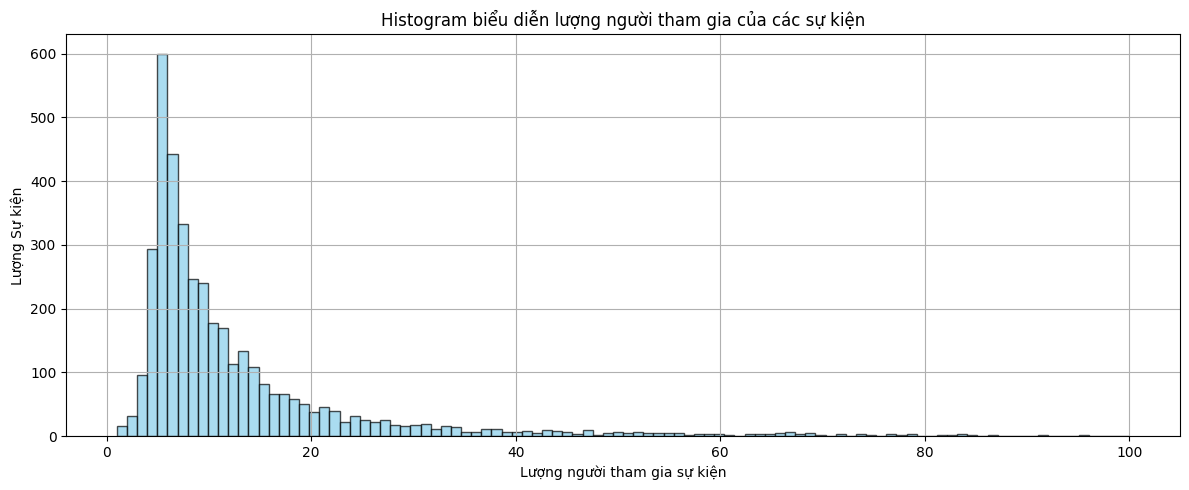

In [ ]:
def draw_histogram(data, bins=100, xlabel="Value", ylabel="Frequency", title="Histogram"):
    plt.figure(figsize=(12, 5))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)  # Đặt màu, độ trong suốt và độ dày viền
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

draw_histogram(list_att,xlabel="Lượng người tham gia sự kiện", ylabel = "Lượng Sự kiện", title = "Histogram biểu diễn lượng người tham gia của các sự kiện")

##Pie chart và bar chart biểu diễn lượng sự kiện của từng loại (nhỏ, vừa và lớn)

In [ ]:
for i in range(5):
  print(data_att[i])


['122', '37994', 'GroupCuisine', '268562400', '5']
['127', '37994', 'GroupCuisine', 'nbljqrybcfblb', '6']
['163', '37994', 'GroupCuisine', '269131690', '5']
['196', '37994', 'GroupCuisine', '270027466', '4']
['585', '12542', 'nyc-astrology', '268717706', '59']


In [ ]:
for row in data_att:
    num_people = int(row[4])
    if num_people <= 8:
        row.append(0)
    elif num_people <= 30:
        row.append(1)  # Label 1 cho nhóm 9-30 người
    else:
        row.append(2)  # Label 2 cho nhóm 31 người trở lên
#kiểm tra lại data att
for i in range(5):
  print(data_att[i])

['122', '37994', 'GroupCuisine', '268562400', '5', 0]
['127', '37994', 'GroupCuisine', 'nbljqrybcfblb', '6', 0]
['163', '37994', 'GroupCuisine', '269131690', '5', 0]
['196', '37994', 'GroupCuisine', '270027466', '4', 0]
['585', '12542', 'nyc-astrology', '268717706', '59', 2]


###Biểu đồ Bar Chart

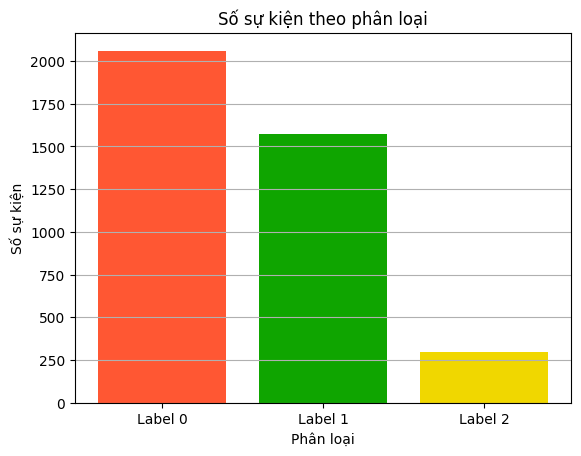

In [ ]:

# Đếm số lần xuất hiện của mỗi nhóm
group_counts = [row[-1] for row in data_att]
group_0_count = group_counts.count(0)
group_1_count = group_counts.count(1)
group_2_count = group_counts.count(2)

# Biểu diễn bằng Bar Chart
labels = ['Label 0', 'Label 1', 'Label 2']
counts = [group_0_count, group_1_count, group_2_count]

colors = ['#FF5733',  '#0FA500', '#F0D700']

plt.bar(labels, counts, color=colors)
plt.xlabel('Phân loại')
plt.ylabel('Số sự kiện')
plt.grid(axis='y', zorder=0)
plt.title('Số sự kiện theo phân loại')
plt.show()


###Biểu đồ Pie Chart

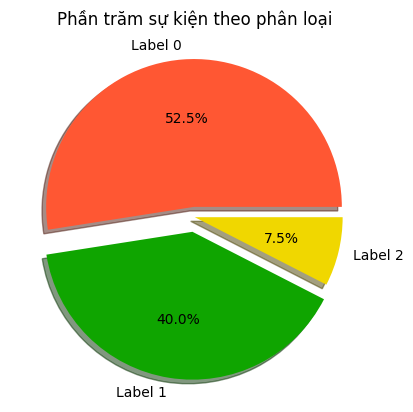

In [ ]:
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=(0.07, .1, 0), shadow=True)
plt.title('Phần trăm sự kiện theo phân loại')
plt.show()


#Trực quan file info

In [ ]:

df_info = pd.read_csv("/content/infomation_process1.csv", encoding = 'iso-8859-1')


In [ ]:
df_info.head()

,id,group_id,group_URLName,event_id,event_name,yes_rvsp_count,created,year,month,day,hour,hour_devi,inWeek,inWeek_devi,time,updated,rating_c_a,fee,how_to_find_us,event_url
0,22449,1001619,classical-139,270125217,ACMA Virtual Recital!,13,1.587230e+12,2020,4,19,16,0.0,Sunday,0.0,158732640,1.587330e+12,0_0,0.0,how to find us,https://www.meetup.com/classical-139/events/27...
1,65511,10024282,New-York-Private-Equity-Venture-Capital-Careers,268674061,NYC Business and Creative Professionals Networ...,11,1.581560e+12,2020,3,4,18,0.4,Wednesday,-0.8,158336460,1.583380e+12,0_0,0.0,how to find us,https://www.meetup.com/New-York-Private-Equity...
2,65512,10024282,New-York-Private-Equity-Venture-Capital-Careers,268233502,"Artificial Intelligence, Robotics & Machine Le...",13,1.580110e+12,2020,3,9,18,0.4,Monday,-2.8,158379300,1.583800e+12,0_0,0.0,how to find us,https://www.meetup.com/New-York-Private-Equity...
3,65513,10024282,New-York-Private-Equity-Venture-Capital-Careers,269686576,Exclusive Virtual Networking (Online Event) - ...,5,1.585300e+12,2020,4,9,19,1.4,Thursday,0.2,158647320,1.586480e+12,0_0,0.0,zoom.com,https://www.meetup.com/New-York-Private-Equity...
4,65514,10024282,New-York-Private-Equity-Venture-Capital-Careers,269126179,Workshop For Beginners - Java Website Programm...,5,1.583130e+12,2020,4,26,15,-2.6,Sunday,3.2,158792760,1.587940e+12,0_0,0.0,Entrance On Elizabeth Street To Sheen Center,https://www.meetup.com/New-York-Private-Equity...


##Ghép file info

In [ ]:

df_att = pd.DataFrame(data_att, columns = ['id', 'group_id', 'Group_name_url', 'event_id', 'attendees', 'label'])

In [ ]:
df_att.head(1)

,id,group_id,Group_name_url,event_id,attendees,label
0,122,37994,GroupCuisine,268562400,5,0


In [ ]:
result = pd.merge(df_att[['event_id', 'label']], df_info, on = 'event_id', how = 'right')

In [ ]:
result.head(3)

,event_id,label,id,group_id,group_URLName,event_name,yes_rvsp_count,created,year,month,...,hour,hour_devi,inWeek,inWeek_devi,time,updated,rating_c_a,fee,how_to_find_us,event_url
0,270125217,1,22449,1001619,classical-139,ACMA Virtual Recital!,13,1.587230e+12,2020,4,...,16,0.0,Sunday,0.0,158732640,1.587330e+12,0_0,0.0,how to find us,https://www.meetup.com/classical-139/events/27...
1,268674061,1,65511,10024282,New-York-Private-Equity-Venture-Capital-Careers,NYC Business and Creative Professionals Networ...,11,1.581560e+12,2020,3,...,18,0.4,Wednesday,-0.8,158336460,1.583380e+12,0_0,0.0,how to find us,https://www.meetup.com/New-York-Private-Equity...
2,268233502,1,65512,10024282,New-York-Private-Equity-Venture-Capital-Careers,"Artificial Intelligence, Robotics & Machine Le...",13,1.580110e+12,2020,3,...,18,0.4,Monday,-2.8,158379300,1.583800e+12,0_0,0.0,how to find us,https://www.meetup.com/New-York-Private-Equity...


##Biểu đồ ngày tham gia sự kiện

<ipython-input-19-9b9d2f70acd5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = 'label', y = 'day', data = result, palette = colors, jitter = True)


Text(0, 0.5, 'Ngày tổ chức')

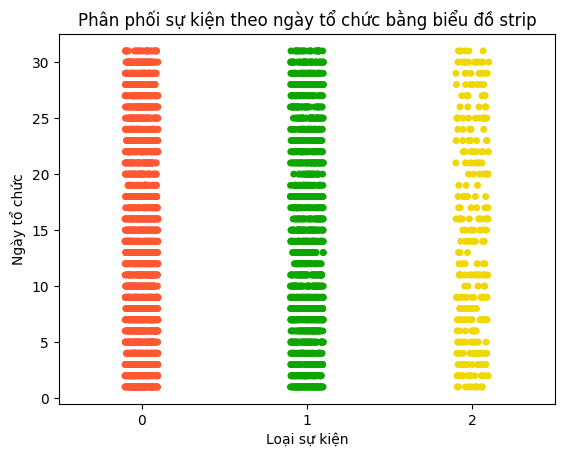

In [ ]:
sns.stripplot(x = 'label', y = 'day', data = result, palette = colors, jitter = True)

plt.title('Phân phối sự kiện theo ngày tổ chức bằng biểu đồ strip')
plt.xlabel('Loại sự kiện')
plt.ylabel('Ngày tổ chức')

<ipython-input-20-188596fe652f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='day', data=result, palette=colors)


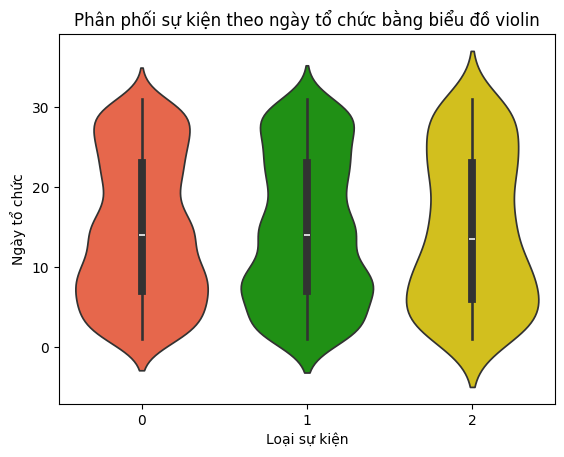

In [ ]:
# Vẽ biểu đồ violin
sns.violinplot(x='label', y='day', data=result, palette=colors)

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối sự kiện theo ngày tổ chức bằng biểu đồ violin')
plt.xlabel('Loại sự kiện')
plt.ylabel('Ngày tổ chức')

# Hiển thị biểu đồ
plt.show()

##Biểu đồ ngày trong tuần tham gia sự kiện

Text(0, 0.5, 'Số sự kiện được tổ chức')

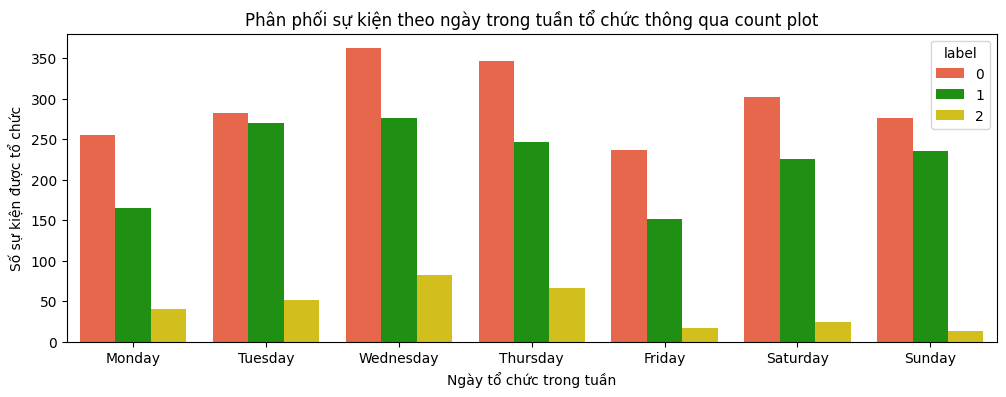

In [ ]:
plt.figure(figsize=(12,4))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(x = 'inWeek', hue = 'label', data = result, palette = colors, order=days_order)
plt.title('Phân phối sự kiện theo ngày trong tuần tổ chức thông qua count plot')
plt.xlabel('Ngày tổ chức trong tuần')
plt.ylabel('Số sự kiện được tổ chức')

##Biểu đồ giờ tham gia sự kiện

Text(0, 0.5, 'Số lượng sự kiện được tổ chức')

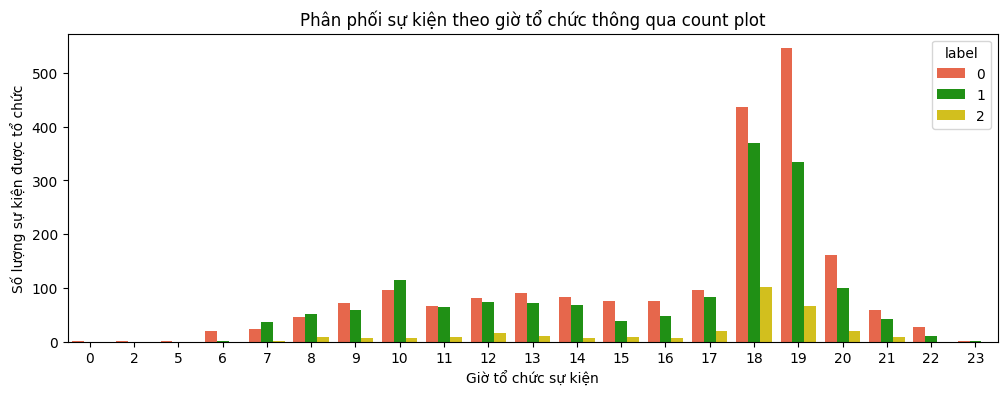

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'hour', hue = 'label', data = result, palette = colors)
plt.title('Phân phối sự kiện theo giờ tổ chức thông qua count plot')
plt.xlabel('Giờ tổ chức sự kiện')
plt.ylabel('Số lượng sự kiện được tổ chức')

loại 0 và 1 được tổ chức nhiều nháat vào 19h nhưng loại 2 được tổ chức nhiều nhất là bắt đầu vào 18h cho thấy sự kiện nhiều người thì cần tổ chức sớm hơn một chút nhưng đồng thời vẫn đảm bảo là vào buổi tối và để ra về không bị muộn


#Trực quan file description

In [ ]:
df_des = pd.read_csv("/content/process2_des_NLTK.csv", encoding = 'iso-8859-1')
df_des.head(2)

,group_id,event_id,similar,description
0,1001619,270125217,1.00000,keep edit click virtual friend safe time well ...
1,10024282,268674061,0.34887,hire idea invest limit sponsor time social att...


In [ ]:

# Lấy cột cuối của data_att và cột 4 của df_des dựa vào cột 'event_id'
result = pd.merge(df_att[['event_id', 'label']], df_des, on='event_id', how='inner')

result.head(2)


,event_id,label,group_id,similar,description
0,268562400,0,37994,0.53383,get come alcohol night met two question team g...
1,nbljqrybcfblb,0,37994,0.53866,prefer data virtual effect way run social long...


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   event_id     3926 non-null   object 
 1   label        3926 non-null   int64  
 2   group_id     3926 non-null   int64  
 3   similar      3926 non-null   float64
 4   description  3908 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 153.5+ KB


In [ ]:
result['label'].value_counts()

label
0    2060
1    1570
2     296
Name: count, dtype: int64

0


<ipython-input-27-e047fe1d9d3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['description'] = label_df['description'].fillna('').astype(str)


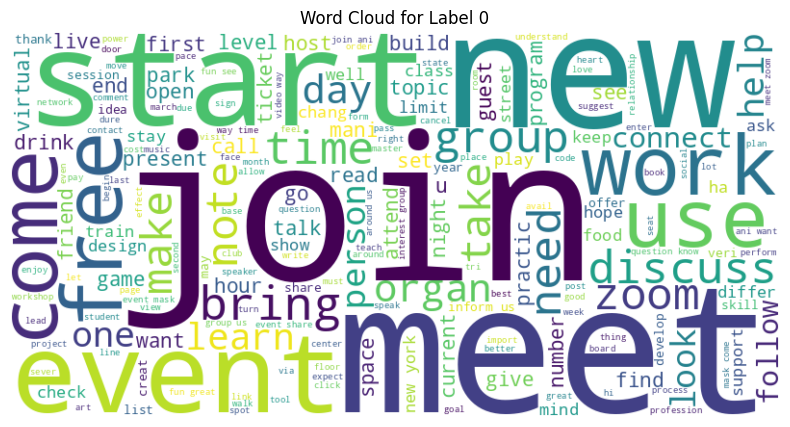

2


<ipython-input-27-e047fe1d9d3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['description'] = label_df['description'].fillna('').astype(str)


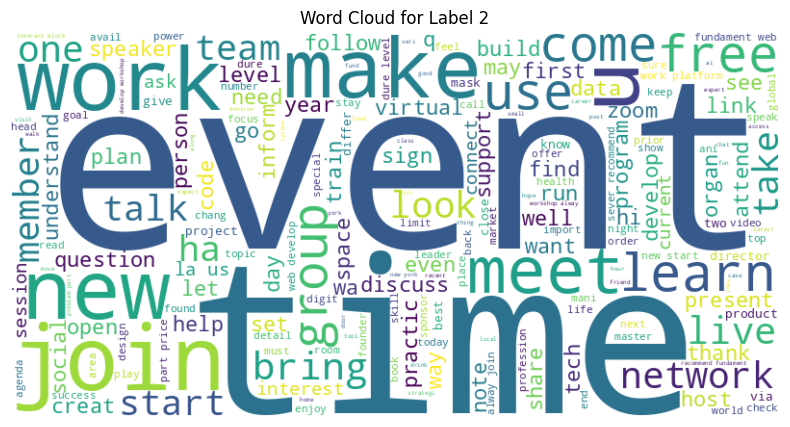

1


<ipython-input-27-e047fe1d9d3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['description'] = label_df['description'].fillna('').astype(str)


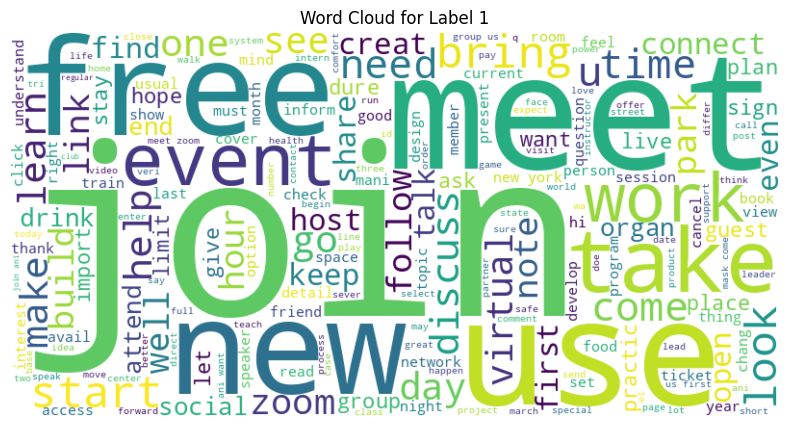

In [ ]:


def plot_word_cloud_for_label(label_value):
    # Filter DataFrame for the given label
    label_df = result[result['label'] == label_value]

    # Remove NaN values from 'description' column and convert to string
    label_df['description'] = label_df['description'].fillna('').astype(str)

    # Concatenate descriptions for the label into a single string
    text = ' '.join(label_df['description'])

    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label {label_value}')
    plt.axis('off')
    plt.show()

# Plot word clouds for each label
for label_value in result['label'].unique():
    print(label_value)
    plot_word_cloud_for_label(label_value)

#Train mô hình

In [ ]:
Data = pd.merge(result[['event_id','similar','label']],df_info[[ 'event_id', 'month', 'day', 'hour',
       'hour_devi', 'inWeek', 'inWeek_devi', 'time']], how = 'left', on = 'event_id')
Data.head(1)


,event_id,similar,label,month,day,hour,hour_devi,inWeek,inWeek_devi,time
0,268562400,0.53383,0,3,5,18,-0.5,Thursday,-0.25,158345100


In [ ]:
Data.describe()

,similar,label,month,day,hour,hour_devi,inWeek_devi,time
count,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3.926000e+03
mean,0.663983,0.550688,3.481151,14.606979,16.124045,0.001910,0.000382,1.585560e+08
std,0.245304,0.631127,0.511798,9.068326,3.869679,2.245891,1.246648,1.709171e+05
min,0.000000,0.000000,2.000000,1.000000,0.000000,-14.000000,-4.363636,1.583023e+08
25%,0.459395,0.000000,3.000000,7.000000,13.000000,-0.465441,-0.567460,1.583863e+08
50%,0.647580,0.000000,3.000000,14.000000,18.000000,0.000000,0.000000,1.585656e+08
75%,0.905833,1.000000,4.000000,23.000000,19.000000,0.888889,0.600000,1.587087e+08
max,1.000000,2.000000,4.000000,31.000000,23.000000,9.333333,4.500000,1.588290e+08


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   event_id     3926 non-null   object 
 1   similar      3926 non-null   float64
 2   label        3926 non-null   int64  
 3   month        3926 non-null   int64  
 4   day          3926 non-null   int64  
 5   hour         3926 non-null   int64  
 6   hour_devi    3926 non-null   float64
 7   inWeek       3926 non-null   object 
 8   inWeek_devi  3926 non-null   float64
 9   time         3926 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 306.8+ KB


In [ ]:
#sort Data by timee
Data = Data.sort_values(by = 'time')
Data.head(2)

,event_id,similar,label,month,day,hour,hour_devi,inWeek,inWeek_devi,time
1996,267662652,0.55168,0,2,29,19,0.0,Saturday,0.0,158302260
2346,268102509,1.00000,1,2,29,20,0.0,Saturday,0.0,158302440


##Trực quan thêm một số biểu đồ

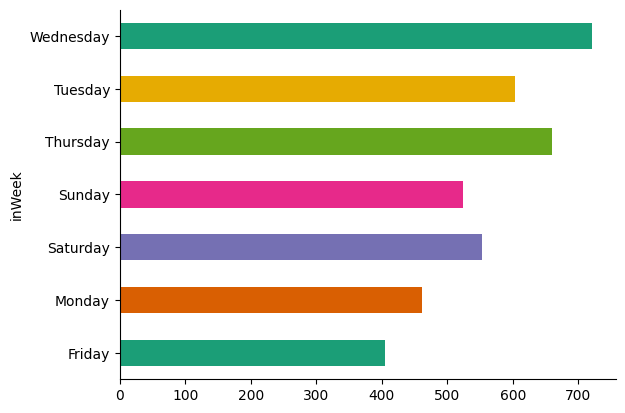

In [ ]:

Data.groupby('inWeek').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

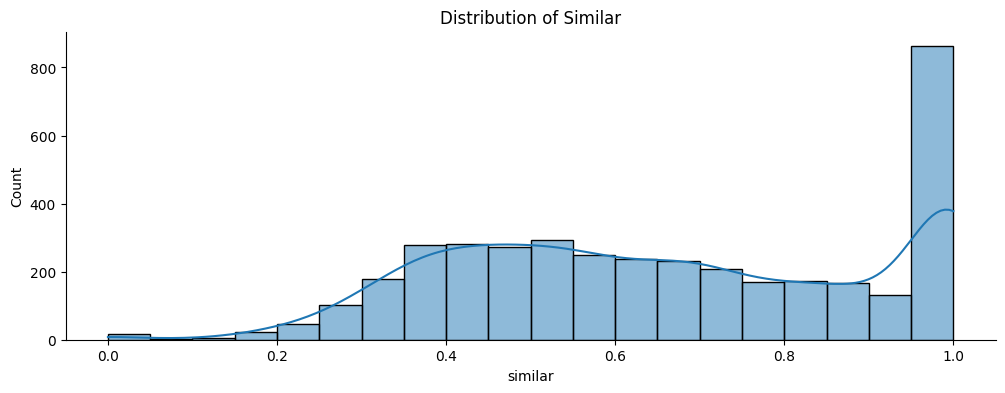

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(result['similar'], bins=20, kde=True)
plt.title('Distribution of Similar')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

<ipython-input-34-8522e2b96a0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(Data, x='day', y='inWeek', inner='box', palette='Dark2')


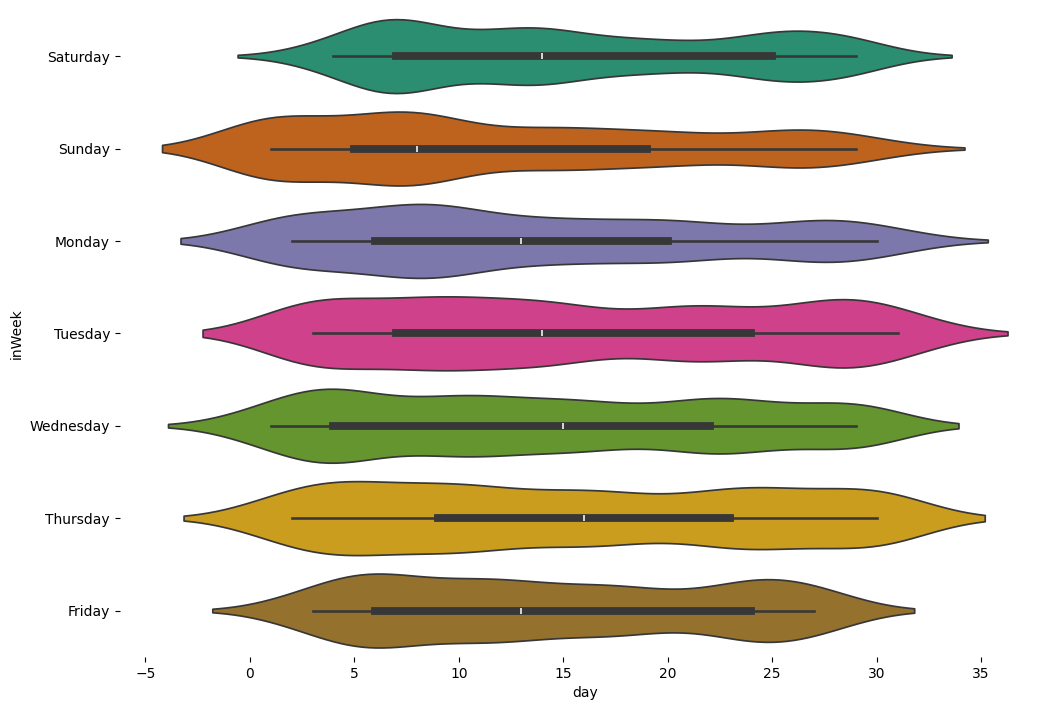

In [ ]:

figsize = (12, 1.2 * len(Data['inWeek'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Data, x='day', y='inWeek', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

##Mã hóa cột in week

In [ ]:
Data = pd.get_dummies(Data, columns=['inWeek'])

# Display the DataFrame with one-hot encoded columns
Data.head(2)

,event_id,similar,label,month,day,hour,hour_devi,inWeek_devi,time,inWeek_Friday,inWeek_Monday,inWeek_Saturday,inWeek_Sunday,inWeek_Thursday,inWeek_Tuesday,inWeek_Wednesday
1996,267662652,0.55168,0,2,29,19,0.0,0.0,158302260,False,False,True,False,False,False,False
2346,268102509,1.00000,1,2,29,20,0.0,0.0,158302440,False,False,True,False,False,False,False


##Chia tập train, test

In [ ]:
Data.columns

Index(['event_id', 'similar', 'label', 'month', 'day', 'hour', 'hour_devi',
       'inWeek_devi', 'time', 'inWeek_Friday', 'inWeek_Monday',
       'inWeek_Saturday', 'inWeek_Sunday', 'inWeek_Thursday', 'inWeek_Tuesday',
       'inWeek_Wednesday'],
      dtype='object')

In [ ]:
features = ['similar', 'day', 'hour', 'hour_devi', 'inWeek_devi',
            'inWeek_Friday', 'inWeek_Monday','inWeek_Saturday',
            'inWeek_Sunday', 'inWeek_Thursday', 'inWeek_Tuesday', 'inWeek_Wednesday']

X = Data[features]
Y = Data['label']

X_train = X.iloc[:int(0.8*len(Data))]
X_test = X.iloc[int(0.8*len(Data)):]
Y_train = Y.iloc[:int(0.8*len(Data))]
Y_test = Y.iloc[int(0.8*len(Data)):]

print("X_train: ", end = '')
print(X_train.shape)
print("X_test", end = ': ')
print(X_test.shape)
print("Y_train", end = ': ')
print(Y_train.shape)
print("Y_test", end = ': ')
print(Y_test.shape)

X_train: (3140, 12)
X_test: (786, 12)
Y_train: (3140,)
Y_test: (786,)


##Các mô hình

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix



###Decision Tree

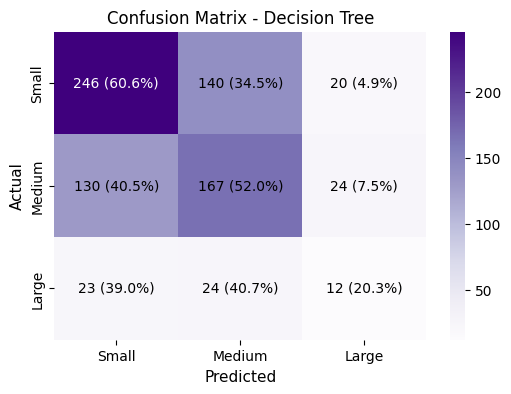

accurrent decision tree:  54.071 %


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
y_pred_tree = dt.predict(X_test)

acc_tree = accuracy_score(Y_test, y_pred_tree)
cm_tree = confusion_matrix(Y_test,y_pred_tree)
percentages_tree = np.round( (cm_tree.T / np.sum(cm_tree,axis = 1)).T * 100, 1)


label_ = ['Small','Medium', 'Large']
plt.figure(figsize=(6, 4))
for i in range(cm_tree.shape[0]):
    for j in range(cm_tree.shape[1]):
        if i == 0 and j == 0:
            text_color = 'white'
        else:
            text_color = 'black'
        plt.text(j + 0.5, i + 0.5, f'{cm_tree[i, j]} ({percentages_tree[i, j]}%)', horizontalalignment='center', verticalalignment='center', color= text_color)
sns.heatmap(cm_tree, annot=False, cmap='Purples', fmt='', xticklabels=label_, yticklabels=label_)
plt.xlabel('Predicted', fontsize = 11)
plt.ylabel('Actual', fontsize = 11)
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print('accurrent decision tree: ',np.round(acc_tree*100,3), "%")

###Random Forest

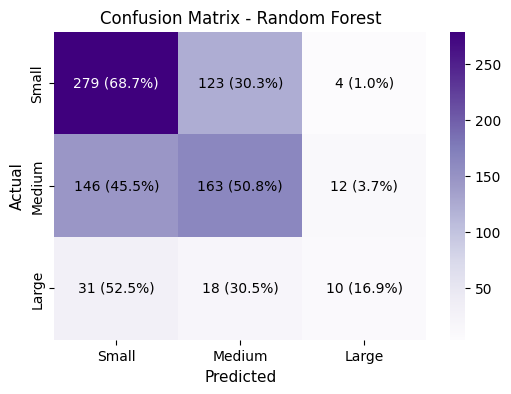

accurrent Random Forest:  57.506 %


In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
y_pred_forest = rf.predict(X_test)

acc_forest = accuracy_score(Y_test, y_pred_forest)
cm_forest = confusion_matrix(Y_test,y_pred_forest)
percentages_forest = np.round((cm_forest.T/np.sum(cm_forest, axis = 1)).T*100,1)

plt.figure(figsize=(6, 4))
for i in range(cm_forest.shape[0]):
    for j in range(cm_forest.shape[1]):
        if i == 0 and j == 0:
            text_color = 'white'
        else:
            text_color = 'black'
        plt.text(j + 0.5, i + 0.5, f'{cm_forest[i, j]} ({percentages_forest[i, j]}%)', horizontalalignment='center', verticalalignment='center', color= text_color)
sns.heatmap(cm_forest, annot=False, cmap='Purples', fmt='', xticklabels=label_, yticklabels=label_)
plt.xlabel('Predicted', fontsize = 11)
plt.ylabel('Actual', fontsize = 11)
plt.title('Confusion Matrix - Random Forest')
plt.show()
print('accurrent Random Forest: ',np.round(acc_forest*100,3), "%")

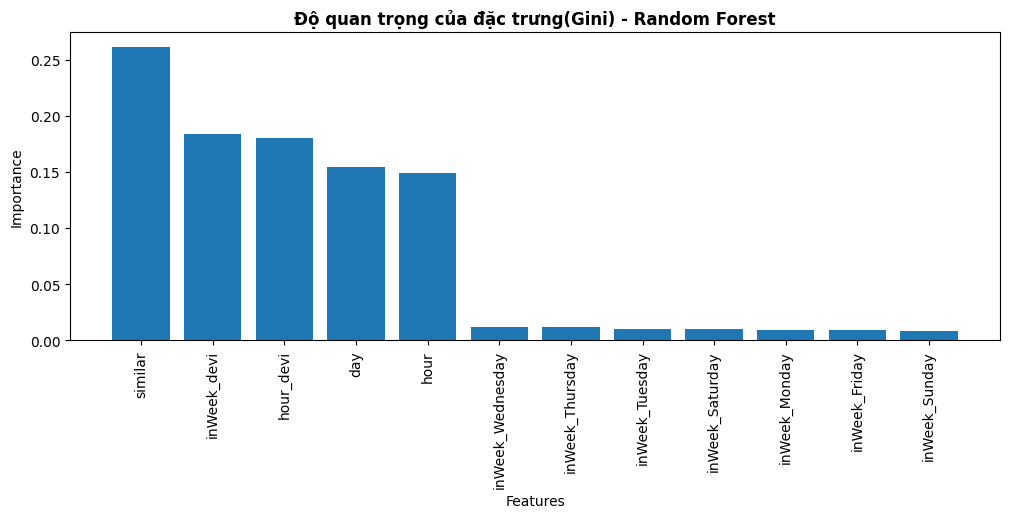

In [ ]:
# Plot feature importances (Gini)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(features)

plt.figure(figsize=(12, 4))
plt.title("Độ quan trọng của đặc trưng(Gini) - Random Forest", fontweight='bold')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()